<center>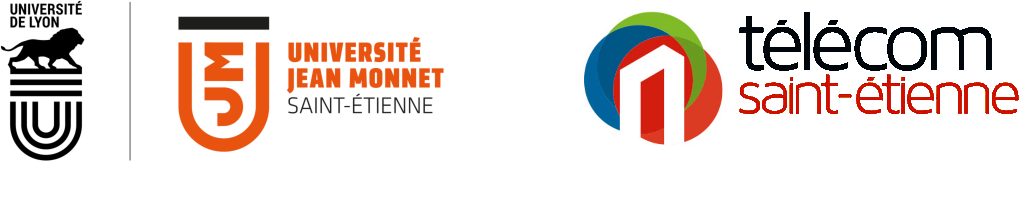</center>

<br>
<center><span style="font-size:35px"><b>Algorithms for Data Analysis</b></span></center>

<center><span style="font-size:25px"><b>Lab 4: Advanced Supervised Learning | Loan Prediction</b></span></center>

Financial institutions across various sectors, including big banks, financial firms, and government agencies, heavily rely on loan services. Their key goal is to minimize payment defaults and ensure borrowers meet their repayment obligations. To achieve this goal systematically, many institutions turn to machine learning techniques. By leveraging machine learning algorithms, these institutions can predict individuals who are most likely to default on their loans. This enables them to implement targeted interventions, thereby optimizing resources and mitigating financial risks effectively.

In [ ]:
!pip install -q dtreeviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import dtreeviz
from dtreeviz import decision_boundaries
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

# 1. Exploratory Data Analysis

This dataset has been taken from Coursera's Loan Default Prediction Challenge and will provide you the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. The dataset has been cleaned, reduced and balanced.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Load the dataset located in the `loan.csv` file. Comment.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Comment the following code. What is its purpose?

In [ ]:
from sklearn.preprocessing import LabelEncoder

for feature in dataset.columns.tolist():
    label_encoder = LabelEncoder()
    dataset[feature] = label_encoder.fit_transform(dataset[feature])

dataset

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** We aim to predict the risk of loan default denoted as $y$ (*fr: défaut de remboursement du prêt*) using various features $X$ extracted from the dataset. Let's define $X$ and $y$ based on the dataset provided. Additionally, compile a list containing the names of all the features.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What proportion of loans in the dataset exhibit default? Please provide commentary on this statistic.

# 2. Decision Tree

## 2.1. Model and visualization tools

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Define and train a decision tree of depth 3 named `tree_classifier` to classify wether a loan is default or not. To do so, use `DecisionTreeClassifier` from scikit-learn.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** In order to visualize the tree, we are going to resort to the package `dtreeviz`. Display the help of the package by typing `help(dtreeviz)`. More particularly, we are interested in the `dtreeviz.model` function to create a model adaptor that provides a consistent interface for displaying trees. Read the corresponding help.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Create a model adaptor using `dtreeviz.model` In our case, the model to pass is the decison tree trained previously. Then call the method `.view()` to display the tree.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** The keyword `x` in `.view(x=x_sample)` provides prediction path illustration for a given sample `x_sample`. Test different samples to visualize their prediction path.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** The member `.explain_prediction_path(x=x_sample)` provides prediction path explanations for a given sample `x_sample`. Try different samples to understand their prediction path.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Comment the following code.

In [ ]:
feature_importances = tree_classifier.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure()
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

## 2.2. Validation of the optimal tree architecture

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Split the data $(X, y)$ into training, validation, and test sets with proportions of 2/3, 1/6, and 1/6 of the total number of samples, respectively.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Validate the optimal decision tree architecture.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** What is the corresponding test score? What are the two most important features? Store them in a variable named `features_2d`.

## 2.3. Impact on the decision boundary

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Randomly sample 200 loans from the dataset using `.sample` (with `random_state=42`). Then, only keep the 2 features found above and stored in `features_2d`. Call the corresponding data $(X_{reduced}, y_{reduced})$.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Define and train different decision trees of various depth. What do you observe?

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Read the help of `dtreeviz.decision_boundaries`. Then use it to display the 2D decision boundary for different tree depth. Is the decision boundary linear?

# 3. Logistic Regression and SVM

We now consider two popular linear classifiers, namely the logistic regression and the support vector machine (SVM).

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Train, validate and test logistic regression model on the same data splittings used in section 2.2.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Same question for a linear SVM.

 **<i class="fa fa-gear fa-spin fa-1x"></i> EXERCISE.** Which model amongst decision tree, logistic regression and SVM performs the best on the test set?